In [ ]:
n=(-0.5,1)
d = 0

x1    x2    y    py = n.a + d
----------------------------
2     1     0    -0.5*2 + 1 * 1 - 0 = 0 
4     2     0    -0.5*4 + 1 * 2 - 0 = 0
6     3     0    -0.5*6 + 1 * 3 - 0 = 0
10    4    -1    -0.5*10 + 1 * 4 - 0 =  -1 <— this point is not on the straight line
3     5    +1    -0.5*3 + 1 * 5 - 0 =  +3.5 <— this point is not on the straight line

[ 2.  3. 13.]


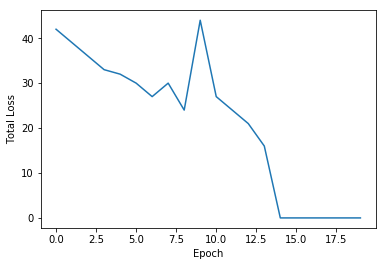

In [30]:
import numpy as np


# bias term -1 
# x1,x2,bias

X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1  # learning rate
    epochs = 20
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        
        errors.append(total_error*-1)
    
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    return w

w1,w2,b = perceptron_sgd(X,y)
print(w1,w2,b)
# the perceptron needed 14 epochs to classify all samples right (total error is zero). 
#The weight vector is (2,3) and the bias term is the third entry -13.

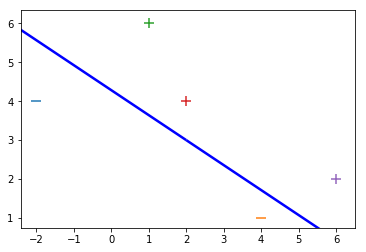

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

for index, sample in enumerate(X):
    # Plot the negative samples
    if index < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
#plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
#plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
P,Q,R,S = zip(*x2x3)
ax = plt.gca()
ax.quiver(P,Q,R,S,scale=1, color='blue')